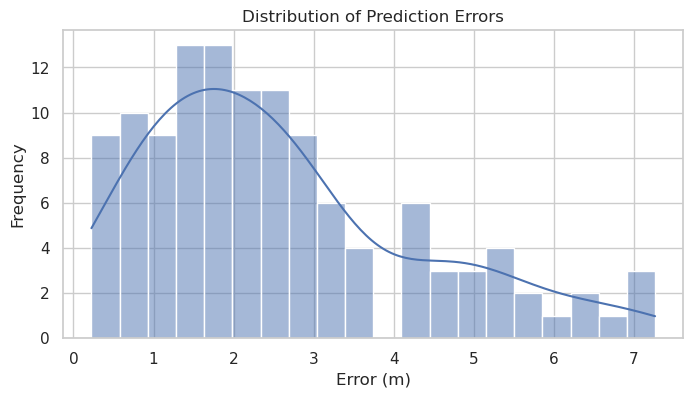

In [14]:
import pandas as pd

df = pd.read_csv("map5_predict_vs_actual_attack.csv")
df.rename(columns={'pos_yaw': 'pos_roll'}, inplace=True)

plt.figure(figsize=(8, 4))
sns.histplot(df['errors'], bins=20, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (m)")
plt.ylabel("Frequency")
plt.show()

In [15]:
# 360도 값을 ±180도 기준으로 정규화
df['normalized_roll'] = df['pos_roll'].apply(lambda x: x - 360 if x > 180 else x)

# 절대값 취해서 기울기 크기만 추출
df['abs_roll'] = df['normalized_roll'].abs()

# 절대값 기준 10도 간격으로 구간 나누기
df['abs_roll_bin'] = pd.cut(df['abs_roll'], bins=[0, 10, 20, 30, 40])

# 각 구간에서 평균 errors 계산
roll_error_summary = df.groupby('abs_roll_bin')['errors'].mean().reset_index()

# 보기 좋게 출력
display(roll_error_summary)

,abs_roll_bin,errors
0,"(0, 10]",2.284420
1,"(10, 20]",2.420900
2,"(20, 30]",2.636992
3,"(30, 40]",4.141863


/tmp/ipykernel_54564/2751391940.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='abs_roll_bin', y='errors', data=roll_error_summary, palette='Blues_d')


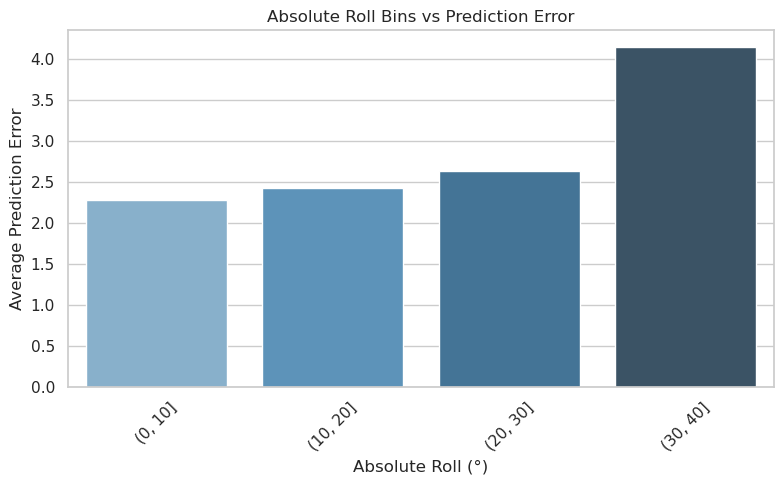

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 적용 (optional)
sns.set(style="whitegrid")

# 막대그래프 그리기
plt.figure(figsize=(8, 5))
sns.barplot(x='abs_roll_bin', y='errors', data=roll_error_summary, palette='Blues_d')

# 제목 및 라벨
plt.title('Absolute Roll Bins vs Prediction Error')
plt.xlabel('Absolute Roll (°)')
plt.ylabel('Average Prediction Error')

# x축 라벨 회전 (선택)
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()